In [55]:
import pandas as pd
import matplotlib.pyplot as plt
import os

base_dir = "C://Users//nitin//eclipse-workspace//consensus-deep-learning-version-2.0//data/mnist_balanced/results/"

paths = [os.path.join(base_dir, "results_{}.csv".format(i)) for i in range(1,2)]
dfs = [pd.read_csv(p, header=0) for p in paths]
# df2 = pd.read_csv(paths[1], header=0)
# df3 = pd.read_csv(paths[2], header=0)

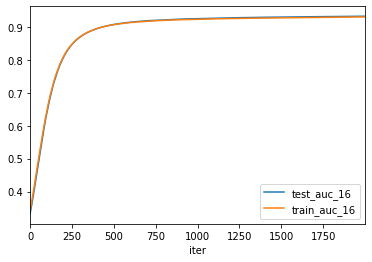

In [56]:
fig, ax = plt.subplots()
# df = df[df["Iter"]%20==0]
for i in range(len(dfs)):
    num_nodes = len(set(dfs[i]["node"].values))
    dfs[i][dfs[i]["iter"] < 8000].groupby(["iter"]).mean()["overall_train_auc"].plot(ax=ax, label = "test_auc_" + str(num_nodes), legend=True)
    dfs[i][dfs[i]["iter"] < 8000].groupby(["iter"]).mean()["overall_test_auc"].plot(ax=ax, label = "train_auc_" + str(num_nodes), legend=True)
# df2[df2["iter"] < 7000].groupby(["iter"]).mean()["overall_test_accuracy"].plot(ax=ax, label='num_nodes=4', legend=True)
# df3[df3["iter"] < 7000].groupby(["iter"]).mean()["overall_test_accuracy"].plot(ax=ax, label='num_nodes=6', legend=True)

In [29]:
from tqdm import tqdm_notebook
def rename_columns(path, opath):
    df = pd.read_csv(path, header=None)
    df.columns = ["label"] + list(range(1,len(df.columns)))
    df.to_csv(opath, index=False)
    
    
paths = ["C://Users//nitin//eclipse-workspace//consensus-deep-learning-version-2.0//data//dexter/feature_split_2/dexter_test_binary.csv",
        "C://Users//nitin//eclipse-workspace//consensus-deep-learning-version-2.0//data//dexter/feature_split_2/dexter_train_binary.csv",
        "C://Users//nitin//eclipse-workspace//consensus-deep-learning-version-2.0//data//gisette/feature_split_2/gisette_test_binary.csv",
        "C://Users//nitin//eclipse-workspace//consensus-deep-learning-version-2.0//data//gisette/feature_split_2/gisette_train_binary.csv"]

opaths = ["C://Users//nitin//eclipse-workspace//consensus-deep-learning-version-2.0//data//dexter/dexter_test_binary.csv",
        "C://Users//nitin//eclipse-workspace//consensus-deep-learning-version-2.0//data//dexter/dexter_train_binary.csv",
        "C://Users//nitin//eclipse-workspace//consensus-deep-learning-version-2.0//data//gisette/gisette_test_binary.csv",
        "C://Users//nitin//eclipse-workspace//consensus-deep-learning-version-2.0//data//gisette/gisette_train_binary.csv"]

for i in tqdm_notebook(range(len(paths))):
    rename_columns(paths[i], opaths[i])

In [17]:
import numpy as np

In [29]:
mnist_data = pd.read_csv("C://Users//nitin//eclipse-workspace//consensus-deep-learning-version-2.0//data/mnist_balanced/mnist_balanced_train_binary.csv")
mnist_data = mnist_data.to_numpy()

In [31]:
mnist_data.shape


(11702, 785)

In [32]:
labels = mnist_data[:,0]
labels

array([0., 0., 0., ..., 1., 1., 1.])

In [34]:
features = mnist_data[:,1:]
features.shape

(11702, 784)

In [40]:
ex = features[0,:]
ex = ex.reshape((28,28))

ex.shape

(28, 28)

In [54]:
feature_mats = []
# create an index matrix to know which indices are being subset
index_mat = np.arange(784)
index_mat = index_mat.reshape((28, 28))
for i in range(4):
    for j in range(4):
        f_mat = ex[i*7:(i+1)*7, j*7:(j+1)*7]
        indices = index_mat[i*7:(i+1)*7, j*7:(j+1)*7]
        print(indices.reshape((-1, 49)).squeeze().tolist())
        print(i, j, f_mat.shape)
        

[0, 1, 2, 3, 4, 5, 6, 28, 29, 30, 31, 32, 33, 34, 56, 57, 58, 59, 60, 61, 62, 84, 85, 86, 87, 88, 89, 90, 112, 113, 114, 115, 116, 117, 118, 140, 141, 142, 143, 144, 145, 146, 168, 169, 170, 171, 172, 173, 174]
0 0 (7, 7)
[7, 8, 9, 10, 11, 12, 13, 35, 36, 37, 38, 39, 40, 41, 63, 64, 65, 66, 67, 68, 69, 91, 92, 93, 94, 95, 96, 97, 119, 120, 121, 122, 123, 124, 125, 147, 148, 149, 150, 151, 152, 153, 175, 176, 177, 178, 179, 180, 181]
0 1 (7, 7)
[14, 15, 16, 17, 18, 19, 20, 42, 43, 44, 45, 46, 47, 48, 70, 71, 72, 73, 74, 75, 76, 98, 99, 100, 101, 102, 103, 104, 126, 127, 128, 129, 130, 131, 132, 154, 155, 156, 157, 158, 159, 160, 182, 183, 184, 185, 186, 187, 188]
0 2 (7, 7)
[21, 22, 23, 24, 25, 26, 27, 49, 50, 51, 52, 53, 54, 55, 77, 78, 79, 80, 81, 82, 83, 105, 106, 107, 108, 109, 110, 111, 133, 134, 135, 136, 137, 138, 139, 161, 162, 163, 164, 165, 166, 167, 189, 190, 191, 192, 193, 194, 195]
0 3 (7, 7)
[196, 197, 198, 199, 200, 201, 202, 224, 225, 226, 227, 228, 229, 230, 252, 253, 2

array([[  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,
         13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,
         26,  27],
       [ 28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,  39,  40,
         41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,  52,  53,
         54,  55],
       [ 56,  57,  58,  59,  60,  61,  62,  63,  64,  65,  66,  67,  68,
         69,  70,  71,  72,  73,  74,  75,  76,  77,  78,  79,  80,  81,
         82,  83],
       [ 84,  85,  86,  87,  88,  89,  90,  91,  92,  93,  94,  95,  96,
         97,  98,  99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109,
        110, 111],
       [112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124,
        125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137,
        138, 139],
       [140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152,
        153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165,
        166, 167],
       [16